### Campaign ROI Model

- Objective: create ML model to target customers within customer segment as part of given campaign
- Customers are selected within the segment based on avg customer clv
- A higher avg customer clv will allow for a proportionally lower decision threshold, and viceversa
- Duration cannot be used

In [38]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

In [39]:
df = pd.read_pickle('data/data_ready.pickle')

In [40]:
y = df.y
duration = df.duration
df.drop(['y', 'duration'], axis=1, inplace=True)
X = df.copy()

In [41]:
X.head()

,year,month,day,age,job,marital,education,default,housing,loan,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,weekday,month_total_days,is_holiday,holiday_name,biz_payday,govt_payday
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-05,2008,5,5,56,3,1,0,0,0,0,...,93.994,-36.4,4.857,5191.0,0,31,0,2,0,0
2008-05-05,2008,5,5,57,7,1,3,1,0,0,...,93.994,-36.4,4.857,5191.0,0,31,0,2,0,0
2008-05-05,2008,5,5,37,7,1,3,0,2,0,...,93.994,-36.4,4.857,5191.0,0,31,0,2,0,0
2008-05-05,2008,5,5,40,0,1,1,0,0,0,...,93.994,-36.4,4.857,5191.0,0,31,0,2,0,0
2008-05-05,2008,5,5,56,7,1,3,0,0,2,...,93.994,-36.4,4.857,5191.0,0,31,0,2,0,0


Include Tuning Functionality Here

Tune According to Campaign ROI as defined by differenced between avg loan and deposit interest rates and fixed/var campaign costs

In [42]:
clf = LogisticRegression(C=1, max_iter=100, class_weight = 'balanced')

In [43]:
clf.fit(X,y)

/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [44]:
y_pred = clf.predict(X)

In [45]:
def make_conf_matrix(clf, X,y):
    y_pred = clf.predict(X)
    cmx = pd.DataFrame(confusion_matrix(y, y_pred), 
                   index = ['No', 'Yes'],
                   columns = ['No', 'Yes'])
    return cmx

In [46]:
def plot_conf_matrix(cmx):
    cmap = mpl.colors.ListedColormap(['green'])
    cmap1 = mpl.colors.ListedColormap(['red'])
    mask1 = (cmx.isin([cmx.iloc[0,0],cmx.iloc[1,1]]))
    
    f, ax = plt.subplots(figsize = (9,6))
    sns.heatmap(cmx, annot=True, fmt = 'g', cmap = cmap,
            cbar = False, annot_kws={"size": 20},
            ax=ax)
    sns.heatmap(cmx, mask=mask1 , cmap=cmap1, cbar=False)

    ax.set_ylabel('True label', fontsize = 15)
    ax.set_xlabel('Predicted label', fontsize = 15)
    ax.set_title("Confusion Matrix", fontsize = 20)
    plt.show()

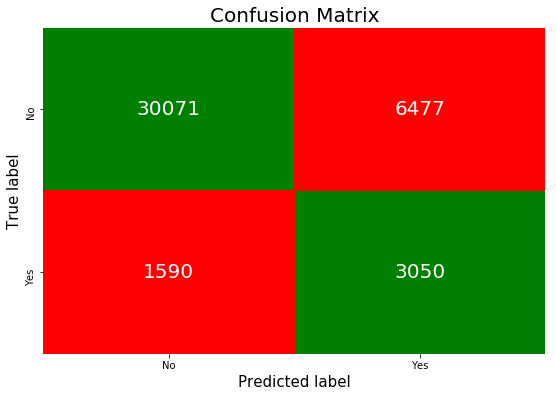

In [47]:
#Creating Confusion Matrix for Dirty Model:
cmx = make_conf_matrix(clf, X, y)
plot_conf_matrix(cmx)

In [48]:
print("Campaign Targets:", cmx.iloc[1,1]+cmx.iloc[0,1])

Campaign Targets: 9527


In [49]:
accept_est = cmx.iloc[1,1]
reject_est = cmx.iloc[0,1]
total_targeted = accept_est+reject_est

In [50]:
type(y)

pandas.core.series.Series

In [51]:
#enhancement: create rolling window logistic regression predicting next month's subscriptions

In [52]:
Xex = X[['year','month','age','job','marital']]

In [53]:
Xex.head()

,year,month,age,job,marital
Date,,,,,
2008-05-05,2008,5,56,3,1
2008-05-05,2008,5,57,7,1
2008-05-05,2008,5,37,7,1
2008-05-05,2008,5,40,0,1
2008-05-05,2008,5,56,7,1


In [54]:
Xex.reset_index(drop=0, inplace=True)

In [56]:
y = y.reset_index(drop=1)

In [58]:
clf = LogisticRegression(solver='sag')

In [62]:
Xex.drop(columns='Date',inplace=True)

/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [63]:
clf.fit(Xex,y)

/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
clf.predict(np.array([1,2,3,1,1]).reshape(1,-1))

array([1], dtype=int8)

In [12]:
#for each value in decision threshold range, 
    #create logistic regression
    #calculate profit for campaign with average CLV for next x months
#select the logistic regression yielding the highest ROI

Campaign ROI Calculation

In [44]:
%store -r 'pred_clv'

In [49]:
customers_monthly = df[['year','month','day']].groupby(by=['year','month']).count()
customers_monthly = customers_monthly.reset_index()
customers_monthly.rename(columns = {'day':'count'},inplace=True)
customers_monthly.head()

,year,month,count
0,2008,5,7763
1,2008,6,4374
2,2008,7,6685
3,2008,8,5175
4,2008,10,67


In [50]:
customers_monthly['perc_of_total'] = customers_monthly['count']/customers_monthly['count'].sum()

In [20]:
def calc_revenue(accept_est, pred_clv):
    return accept_est*pred_clv     

In [ ]:
#calculate revenue on a monthly basis comparing with predicted customer clv
#compare y with y pred and do a monthly classification matrix

In [53]:
revenue_est = calc_revenue(customers_monthly['count'], pred_clv)

ValueError: Length of passed values is 32, index implies 26

In [23]:
revenue_est

array([[446637.00753979],
       [501670.21111085],
       [601489.25756288],
       [581586.91486844],
       [618839.30795804],
       [657785.29383017],
       [668546.34464979],
       [602267.51151426],
       [433297.83443806],
       [522265.27937144],
       [562186.62036074],
       [390829.6445475 ],
       [468068.19524095]])

In [ ]:
def calc_